## Pelabelan Dengan VADER

In [9]:
from flask import Flask, send_file
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

app = Flask(__name__)

In [10]:
# Fungsi untuk melabeli sentimen menggunakan VADER
def label_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 1  # Sentimen positif
    else:
        return 0  # Sentimen negatif

In [11]:
@app.route('/')
def label_twitter_sentiment():
    # Baca dataset dari file CSV
    df = pd.read_csv('/content/dataset.csv')

In [12]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
# Tambahkan kolom 'label' dengan sentimen yang dilabeli menggunakan VADER
df['label'] = df['tweet'].apply(label_sentiment)

In [16]:
# Simpan dataframe yang sudah dilabeli ke file CSV
labeled_file_path = 'data_twitter_labeled.csv'
df.to_csv(labeled_file_path, index=False)

return f'<a href="/download">Klik di sini</a> untuk mengunduh file labeled CSV.'


SyntaxError: ignored

In [8]:
@app.route('/download')
def download_file():
    labeled_file_path = 'data_twitter_labeled.csv'
    return send_file(labeled_file_path, as_attachment=True, attachment_filename='data_twitter_labeled.csv')

if __name__ == '__main__':
    app.run()

File 'data_twitter_labeled.csv' berhasil diunduh.


# **Import Library**


In [17]:
pip install rank_bm25

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import pandas as pd
#preprocesing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
#split data
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
# mb25
from rank_bm25 import BM25Okapi
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np



In [19]:
df = pd.read_csv('/content/data_twitter_labeled.csv')
df.shape

(3075, 5)

In [20]:
df.head()

,id,created_at,username,tweet,label
0,1492424198970802176,2022-02-12 09:03:51 UTC,pdi_perjuangan,"Setalah melalui proses sidang paripurna, lanju...",0
1,1508761884648161282,2022-03-29 11:03:59 UTC,pdi_perjuangan,"Dikatakannya, reses dilaksanakan untuk menyera...",0
2,1508603069168484355,2022-03-29 00:32:54 UTC,xaximata,Tanda tanda 4 ekonomi USA akan melambat/resesi...,0
3,1508602209889841152,2022-03-29 00:29:29 UTC,xaximata,Tanda tanda 3 ekonomi USA akan melambat/resesi...,0
4,1508602105350979584,2022-03-29 00:29:05 UTC,xaximata,Tanda tanda 2 ekonomi USA akan melambat/resesi...,0


# **Pre-Processing**

In [21]:
# Mengunduh library NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
# Fungsi untuk melakukan pre-processing pada teks
def preprocess_text(text):
    # Menghapus akun pengguna Twitter (username)
    text = re.sub(r'@[^\s]+', '', text)

    # Menghapus retweet
    text = re.sub(r'RT[\s]+', '', text)

    # Menghapus karakter non-alfanumerik
    text = re.sub(r'\W', ' ', text)

    # Menghapus angka
    text = re.sub(r'\d+', '', text)

    # Menghapus whitespace berlebih
    text = re.sub(r'\s+', ' ', text)

    # Mengubah teks menjadi lowercase (Case Folding)
    text = text.lower()

    # Menghapus kata-kata yang tidak penting (stopwords)
    stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]

    # Melakukan stemming menggunakan Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]

    # Menggabungkan kata-kata yang telah diproses menjadi satu teks
    processed_text = ' '.join(stemmed_text)
    
    return processed_text

In [23]:
# Membuat DataFrame dari data sentimen
df = pd.DataFrame(df)

In [24]:
# Menghapus duplikat
df.drop_duplicates(inplace=True)

In [25]:
# Pre-processing pada data sentimen
df['tweet	'] = df['tweet'].apply(preprocess_text)

In [26]:
def remove_links(text):
    # Menghapus link menggunakan regular expression
    pattern = r"http\S+"
    text = re.sub(pattern, "", text)
    return text

# Menghapus link pada kolom 'tweet'
df['tweet'] = df['tweet'].apply(remove_links)

In [27]:
def remove_retweet(text):
    # Menghapus pola retweet menggunakan regular expression
    pattern = r"RT\s@[A-Za-z0-9_]+: "
    text = re.sub(pattern, "", text)
    return text

# Menghapus retweet pada kolom 'tweet'
df['tweet'] = df['tweet'].apply(remove_retweet)

In [28]:
print(df)

                       id               created_at         username  \
0     1492424198970802176  2022-02-12 09:03:51 UTC   pdi_perjuangan   
1     1508761884648161282  2022-03-29 11:03:59 UTC   pdi_perjuangan   
2     1508603069168484355  2022-03-29 00:32:54 UTC         xaximata   
3     1508602209889841152  2022-03-29 00:29:29 UTC         xaximata   
4     1508602105350979584  2022-03-29 00:29:05 UTC         xaximata   
...                   ...                      ...              ...   
3068  1585191435875540992  2022-10-26 08:47:44 UTC        mncupdate   
3069  1585185072956993536  2022-10-26 08:22:27 UTC      pigshavew0n   
3071  1585144099686207488  2022-10-26 05:39:38 UTC         212bowie   
3073  1585136674191052801  2022-10-26 05:10:08 UTC          ponopro   
3074  1585135356437200896  2022-10-26 05:04:54 UTC  bukanorangbija2   

                                                  tweet  label  \
0     Setalah melalui proses sidang paripurna, lanju...      0   
1     Dikatakan

# **Split Data**

In [30]:
X = df['tweet'].tolist() 
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Jumlah data latih
num_train = len(X_train)
print("Jumlah data latih:", num_train)

# Jumlah data uji
num_test = len(X_test)
print("Jumlah data uji:", num_test)

Jumlah data latih: 2409
Jumlah data uji: 603


In [32]:
# Menghapus baris dengan nilai NaN pada y_train
y_train_cleaned = y_train.dropna()

# Menggabungkan X_train_tfidf dan y_train yang sudah dibersihkan
X_train_cleaned = X_train[:len(y_train_cleaned)]

In [33]:
# Menghapus baris dengan nilai NaN pada y_train
y_test_cleaned = y_test.dropna()


In [34]:
# Membangun representasi numerik dari data teks menggunakan CountVectorizer dengan N-gram
ngram_range = (1, 2)  # Ubah n-gram range sesuai kebutuhan
vectorizer = CountVectorizer(ngram_range=ngram_range)
X_train_counts = vectorizer.fit_transform(X_train_cleaned)

In [35]:
df_counts = pd.DataFrame(X_train_counts.toarray(), columns=vectorizer.get_feature_names_out())
print(df_counts)

      00  00 16  00 17  00 20  00 daftar  00 karena  00 selesai  00 wib  \
0      0      0      0      0          0          0           0       0   
1      0      0      0      0          0          0           0       0   
2      0      0      0      0          0          0           0       0   
3      0      0      0      0          0          0           0       0   
4      0      0      0      0          0          0           0       0   
...   ..    ...    ...    ...        ...        ...         ...     ...   
2404   0      0      0      0          0          0           0       0   
2405   0      0      0      0          0          0           0       0   
2406   0      0      0      0          0          0           0       0   
2407   0      0      0      0          0          0           0       0   
2408   0      0      0      0          0          0           0       0   

      00 wita  000  ...  𝐓𝐞𝐧𝐠𝐠𝐚𝐫𝐚 𝐁𝐚𝐫𝐚𝐭  𝗘𝗸𝗼𝗻𝗼𝗺𝗶  𝗚𝗮𝘀  𝗚𝗮𝘀 𝗣𝗼𝗹  𝗝𝗼𝗸𝗼𝘄𝗶  \
0           0    0  ...  

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 78069 (\N{EGYPTIAN HIEROGLYPH E030}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12640 (\N{HANGUL LETTER YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120285 (\N{MATHEMATICAL SANS-SERIF BOLD CAPITAL J}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120316 (\N{MATHEMATICAL SANS-SERIF BOLD SMALL O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120312 (\N{MATHEMATICAL SANS-SERIF BOLD SMALL K}) missing from current font.
  fig.canvas.print_figur

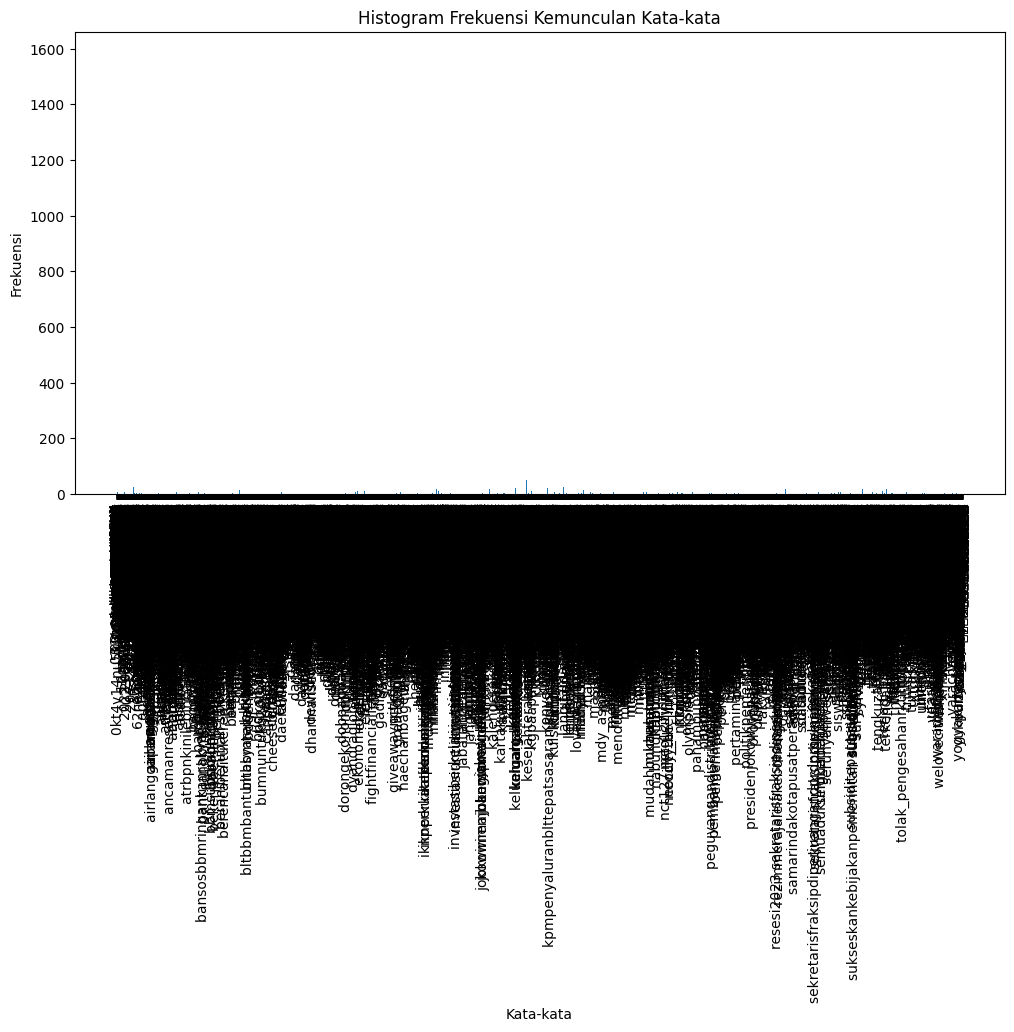

In [36]:
# Mengambil daftar fitur (kata-kata) dari CountVectorizer
feature_names = vectorizer.get_feature_names_out()

# Menghitung frekuensi kemunculan kata-kata
word_counts = X_train_counts.sum(axis=0).tolist()[0]

# Membuat histogram dari frekuensi kemunculan kata-kata
plt.figure(figsize=(12, 6))
plt.bar(feature_names, word_counts)
plt.xticks(rotation=90)
plt.xlabel("Kata-kata")
plt.ylabel("Frekuensi")
plt.title("Histogram Frekuensi Kemunculan Kata-kata")
plt.show()

# **BM25**

In [37]:
# Membangun BM25 Vectorizer
bm25 = BM25Okapi(X_train)

# Mengubah data pelatihan menjadi vektor BM25
X_train_bm25 = [bm25.get_scores(doc) for doc in X_train]

# Mengubah data uji menjadi vektor BM25
X_test_bm25 = [bm25.get_scores(doc) for doc in X_test]

# Menggabungkan X_train_bm25 dan X_test_bm25
X_train_bm25_combined = np.vstack(X_train_bm25)
X_test_bm25_combined = np.vstack(X_test_bm25)

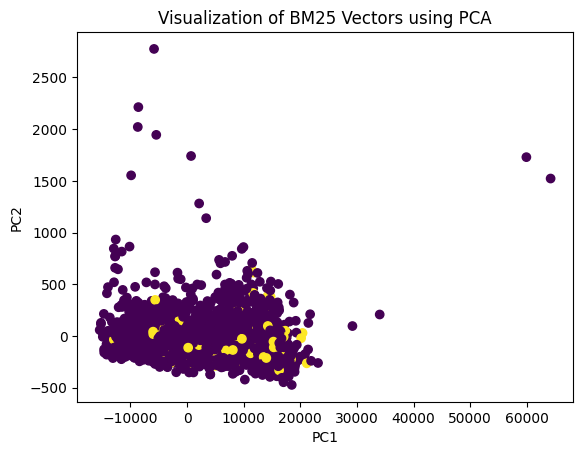

In [38]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_bm25_combined)

# Visualisasi
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of BM25 Vectors using PCA')
plt.show()

# **Word Embedding**

In [39]:
import gensim.downloader as api

In [40]:
X_train_array = np.array(X_train)

In [41]:
word_embedding_model = api.load("word2vec-google-news-300")
word_embedding_dim = 300

[=================================================-] 99.9% 1661.8/1662.8MB downloaded


In [42]:
X_train_wordembed = np.zeros((len(X_train), word_embedding_dim))
for i, sentence in enumerate(X_train):
    tokens = word_tokenize(sentence)
    embeddings = []
    for token in tokens:
        if token in word_embedding_model:
            embeddings.append(word_embedding_model[token])
    if embeddings:
        X_train_wordembed[i] = np.mean(embeddings, axis=0)

In [43]:
# Menghapus baris dengan nilai NaN pada y_train
y_train_cleaned = y_train.dropna()

# Menggabungkan X_train_bm25 dan y_train yang sudah dibersihkan
X_train_bm25_cleaned = X_train_bm25[:y_train_cleaned.shape[0]]

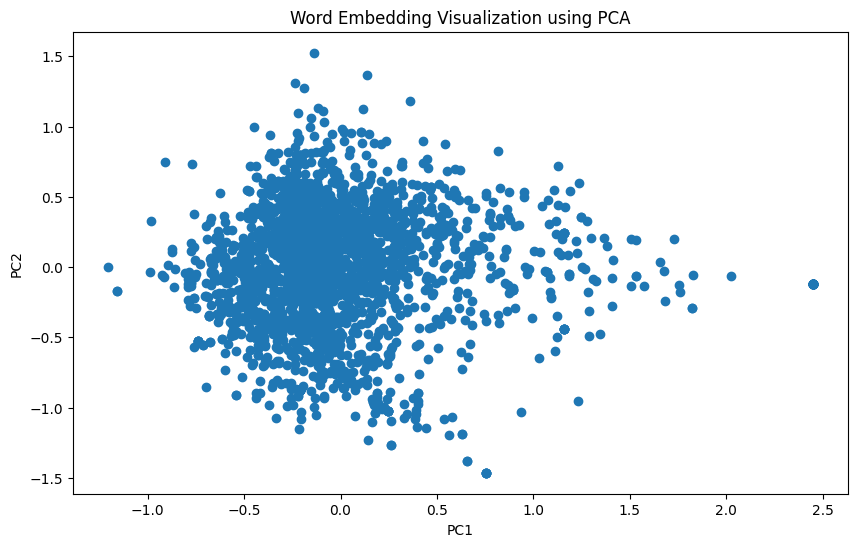

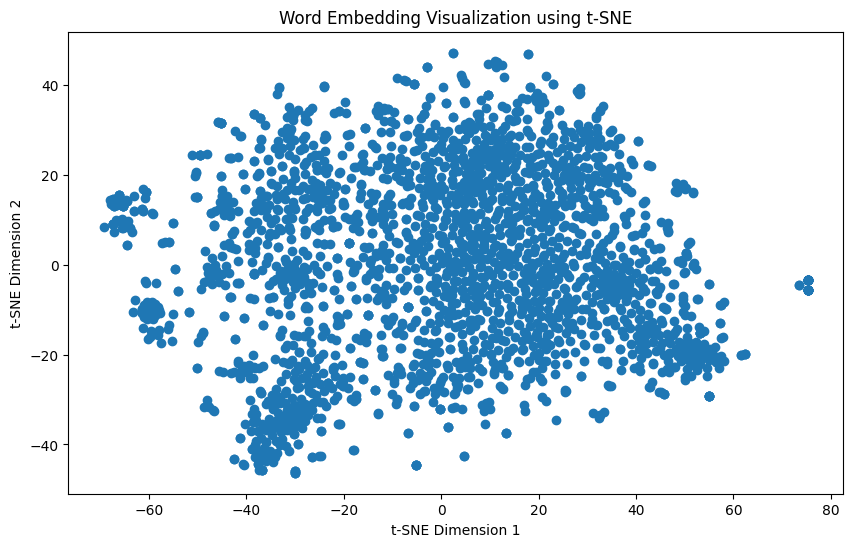

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Melakukan reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_train_wordembed_pca = pca.fit_transform(X_train_wordembed)

# Melakukan reduksi dimensi menggunakan t-SNE
tsne = TSNE(n_components=2)
X_train_wordembed_tsne = tsne.fit_transform(X_train_wordembed)

# Memvisualisasikan hasil word embedding dengan PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_train_wordembed_pca[:, 0], X_train_wordembed_pca[:, 1])
plt.title('Word Embedding Visualization using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Memvisualisasikan hasil word embedding dengan t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(X_train_wordembed_tsne[:, 0], X_train_wordembed_tsne[:, 1])
plt.title('Word Embedding Visualization using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


# **Ensemble Learning**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

In [46]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = SVC(probability=True)

In [47]:
ensemble_model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('rf', model3), ('svm', model4)], voting='soft')

In [48]:
ensemble_model.fit(X_train_bm25_cleaned, y_train_cleaned)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [49]:
# Membuat prediksi dengan model ensemble pada data uji
y_pred_ensemble = ensemble_model.predict(X_test_bm25_combined)
y_pred_proba_ensemble = ensemble_model.predict_proba(X_test_bm25_combined)


## Confusion Matrix

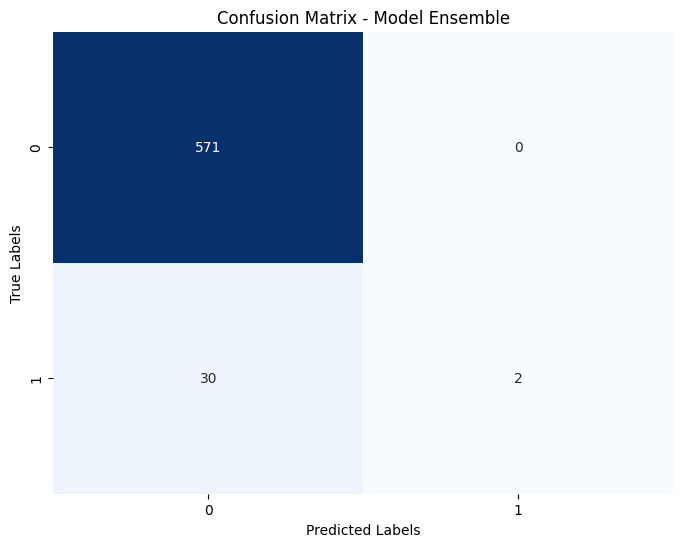

In [53]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Identify NaN values in y_test
nan_indices = np.isnan(y_test)

# Remove NaN values from y_test
y_test_clean = y_test[~nan_indices]

# Remove corresponding elements from y_pred_ensemble
y_pred_ensemble_clean = y_pred_ensemble[~nan_indices]

# Create confusion matrix
cm = confusion_matrix(y_test_clean, y_pred_ensemble_clean)


# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Model Ensemble")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# **Accuracy**

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Mengubah y_pred_ensemble menjadi array numpy
y_pred_ensemble = np.array(y_pred_ensemble)

# Memastikan jumlah sampel yang konsisten
min_len = min(len(y_test_cleaned), len(y_pred_ensemble))
y_test_cleaned = y_test_cleaned[:min_len]
y_pred_ensemble = y_pred_ensemble[:min_len]

# Menampilkan metrik evaluasi
accuracy = accuracy_score(y_test_cleaned, y_pred_ensemble)
precision = precision_score(y_test_cleaned, y_pred_ensemble, average='weighted')
recall = recall_score(y_test_cleaned, y_pred_ensemble, average='weighted')
f1 = f1_score(y_test_cleaned, y_pred_ensemble, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9502487562189055
Precision: 0.9527321793693762
Recall: 0.9502487562189055
F1-score: 0.9289364260807987
